## Week 1 Class activities
This notebook is a starting point for the exercises and activities that we'll do in class.

Before you attempt any of these activities, make sure to watch the Week 1 video lectures.

### Using the `requests` library to query an API
Here's the code that we saw in the video lecture that queries BART for real-time arrivals.

In [ ]:
import json
import pandas as pd
import requests

APIkey = 'MW9S-E7SL-26DU-VV8V'  # the key posted on BART's website
station = 'CIVC'
requestString = 'http://api.bart.gov/api/etd.aspx?cmd=etd&orig={}&json=y&key={}&dir=s'.format(station, APIkey)
r = requests.get(requestString)
d = json.loads(r.text)
etd = d['root']['station'][0]['etd']
print('Trains from {} to {}'.format(station, etd[0]['destination']))
df = pd.DataFrame(etd[0]['estimate'])
df

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Explore the different objects. What are <strong>r</strong>, <strong>d</strong>, and <strong>etd</strong>. What can you do with them?
</div>

Hint: Use `type()` to find out the type of an object (e.g. `type(r)`), and `?` to pull up the help screen (e.g. `r?`).

You can also tab autocomplete to discover an object's attributes and methods (e.g. `r.` and then `TAB`). 

In [ ]:
# your code here
r.

Now let's explore the other options and API commands that BART offers. 

The API documentation for the `etd` (real-time information) command is [here](https://api.bart.gov/docs/etd/etd.aspx). 

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Write a command to retrieve real-time departures for southbound trains at Civic Center station (code: CIVC). Hint: You'll need to add another <strong>&</strong> to <strong>requestString</strong>.
</div>

In [1]:
# your code here

<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Use the <strong>elev</strong> command to obtain the elevator status at each station, and put it in a dataframe. Optional extension: pass the parameters as a dictionary to requests, as we saw in the video lecture.

See the API docs [here](https://api.bart.gov/docs/bsa/elev.aspx) for details of that command.

In [2]:
# your code here

### Accessing census data

Recall that we have seen two ways to access census data:
* The Census Bureau API
* The `cenpy` library

Let's try them both and map patterns of race for Los Angeles County. 

Here's the relevant code that we saw in the video lecture to get the 5-year ACS estimates for population (table `B01001_001E`).

In [ ]:
import json
import requests
import pandas as pd

r = requests.get('https://api.census.gov/data/2015/acs/acs5?get=B01001_001E&for=county')
censusdata = r.json()
df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df.head()

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Retrieve population data at the census tract level for LA County, and put it in a pandas dataframe. (You can use the 5-year ACS if you like.)
</div>

Some examples are given [here](https://api.census.gov/data/2015/acs/acs5/examples.html). 

Note that you don't need the API key for a small number of queries, so you can delete `&key=YOUR_KEY_GOES_HERE` from the examples. 

The FIPS code for California is `06` and for Los Angeles County `037`.

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Retrieve the census data for race/ethnicity for tracts in Los Angeles county, and put it in a pandas dataframe. 
</div>

Hints:
* The list of variables is [here](https://api.census.gov/data/2015/acs/acs5/variables.html).
* The data is crosstabulated by race and age and gender. If you just want race/ethnicity, then look at the `Estimate!!Total:` variables. For example, `B01001H_001E` gives the total number of non-Hispanic white people, without further disaggregating by gender and age. 
* Start with the simplest measure of race. For example, you could calculate the proportion of Black people or non-Hispanic white people in each census tract, by dividing the relevant variable by the total population (which you already retrieved above).
* You can request multiple variables at once - just separate them with commas. For example, `get=NAME,B01001_001E,B01001H_001E`. 
* `NAME` means that you are requesting the description of the geography - this is optional.


In [ ]:
# your code here

<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Now do the same using <strong>cenpy</strong>.
</div>

Here's the relevant example from the lecture. Note if you want multiple variables, you can pass them as a list. For example: `variables=['B25035_001E','B01001H_001E']`.


In [ ]:
import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()
riverside = products.ACS(2017).from_county('Riverside, CA', level='tract',
                                        variables='B25035_001E')
riverside.head()

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Can you write a function that retrieves population by race for all census tracts in a specified county? (Or a simplified measure of race, such as the proportion of Black people.) 
</div>

Hint: use the code you wrote, but replace the county FIPS code `037` with a variable. Your function can take a single argument, e.g. `countyFIPS`.

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Map your results!
</div>

In [ ]:
# your code here

### Using Socrata

Here's the example that we saw in the lecture.

<AxesSubplot:>

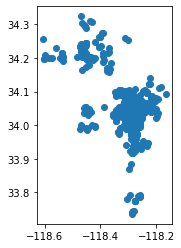

In [1]:
import geopandas as gpd
url = 'https://data.lacity.org/resource/mymu-zi3s.geojson'
gdf = gpd.read_file(url)
gdf.plot()

In [2]:
gpd.read_file?

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Choose another dataset on Socrata, download it using the API, and map the results. 
</div>

The City of Los Angeles datasets are [here](https://data.lacity.org). Feel free to choose another city or county if you prefer.

Some possible datasets of planning-related interest:
* [DACA/DAPA workshops](https://data.lacity.org/Community-Economic-Development/Map2-DACA-DAPA-Workshops/icwt-9z3e) (seems a bit dated)
* [Solar PV permits](https://data.lacity.org/A-Prosperous-City/Solar-PV-Permits-in-LA/bdt7-w2xr)
* [Parks](https://data.lacity.org/Community-Economic-Development/Department-of-Recreation-and-Parks-Facility-and-Pa/ax8j-dhzm)

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<h3>What you should have learned</h3>
<ul>
  <li>Gain confidence in experimenting with code - exploring different objects, writing functions, and so on</li>
  <li>Learn how to read API documentation and adapt the examples to create your own queries.</li>
  <li>Gain confidence in mapping the results. We'll practice this much more throughout the quarter.</li>
</ul>
</div>